https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
import time
import os
from IPython.display import clear_output
%matplotlib inline

import tensorflow as tf

tf.enable_eager_execution()

print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))

E:\Users\gunpc\Anaconda3\envs\tensorflowgpu1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Users\gunpc\Anaconda3\envs\tensorflowgpu1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Users\gunpc\Anaconda3\envs\tensorflowgpu1.4\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Users\gunpc\Anaconda3\envs\tensorflow

tensorflow version: 1.14.0
GPU 사용 가능 여부: True


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
plt.style.use('ggplot')
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string

In [3]:
train_pandas = pd.read_csv('../input/train.csv')
test_pandas = pd.read_csv('../input/test.csv')

In [4]:
train_pandas

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
test_pandas

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [6]:
print(train_pandas.shape, test_pandas.shape)

(7613, 5) (3263, 4)


0        69
1        38
2       133
3        65
4        88
       ... 
7608     83
7609    125
7610     65
7611    137
7612     94
Name: text, Length: 3271, dtype: int64
15       14
16       13
17       16
18       17
19       28
       ... 
7581    104
7582     80
7584    127
7587     18
7593     60
Name: text, Length: 4342, dtype: int64


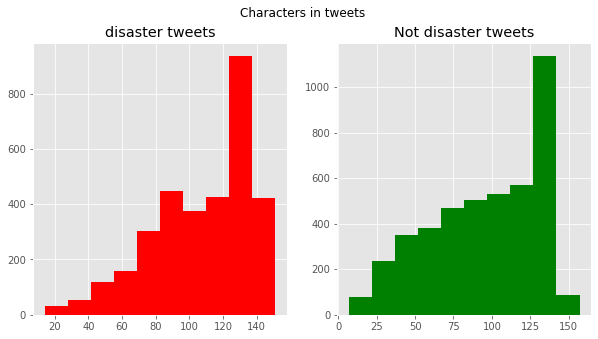

In [7]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
train_len=train_pandas[train_pandas['target']==1]['text'].str.len()
ax1.hist(train_len,color='red')
ax1.set_title('disaster tweets')
print(train_len)
train_len=train_pandas[train_pandas['target']==0]['text'].str.len()
ax2.hist(train_len,color='green')
print(train_len)
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

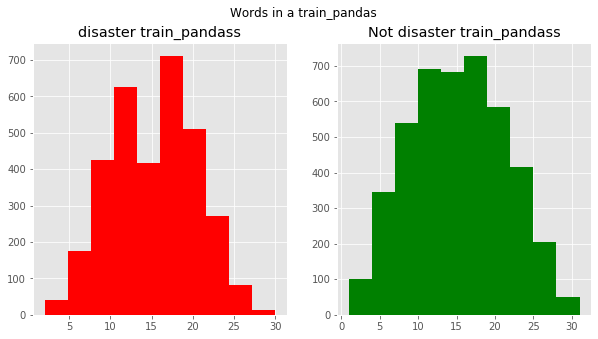

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
train_pandas_len=train_pandas[train_pandas['target']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(train_pandas_len,color='red')
ax1.set_title('disaster train_pandass')
train_pandas_len=train_pandas[train_pandas['target']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(train_pandas_len,color='green')
ax2.set_title('Not disaster train_pandass')
fig.suptitle('Words in a train_pandas')
plt.show()

In [9]:
print("Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all".split())

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']


https://offbyone.tistory.com/73

In [10]:
g = lambda x: x**2
print(g(8))

64


In [11]:
a = [1,2,3,4]
b = [17,12,11,10]
list(map(lambda x, y:x+y, a,b))

[18, 14, 14, 14]

In [12]:
foo = [2, 18, 9, 22, 17, 24, 8, 12, 27]
list( filter(lambda x: x % 3 == 0, foo) )

[18, 9, 24, 12, 27]

In [13]:
from functools import reduce
reduce(lambda x,y: x+y, [1,2,3,4,5])

15

0                [3, 5, 3, 3, 6, 2, 4, 11, 3, 5, 7, 2, 3]
1                                   [6, 4, 4, 2, 5, 5, 6]
2       [3, 9, 5, 2, 8, 2, 6, 3, 5, 8, 2, 9, 2, 5, 10,...
3                             [6, 6, 7, 10, 10, 6, 2, 10]
4       [4, 3, 4, 4, 5, 4, 4, 7, 2, 5, 4, 10, 5, 4, 1, 6]
                              ...                        
7608                   [3, 5, 6, 7, 1, 6, 8, 4, 6, 5, 22]
7609    [12, 12, 3, 3, 2, 7, 4, 5, 2, 10, 4, 2, 3, 8, ...
7610                            [5, 6, 8, 1, 2, 7, 7, 22]
7611    [6, 13, 5, 2, 6, 8, 4, 1, 3, 2, 6, 9, 6, 5, 8,...
7612            [3, 7, 4, 5, 5, 2, 8, 10, 8, 1, 3, 4, 22]
Name: text, Length: 3271, dtype: object


Text(0.5, 0.98, 'Average word length in each train_pandas')

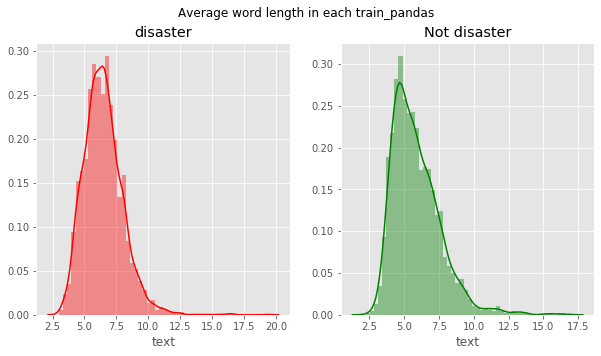

In [14]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_pandas[train_pandas['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
print(word)
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_pandas[train_pandas['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Average word length in each train_pandas')

In [15]:
def create_corpus(target):
    corpus=[]
    
    for x in train_pandas[train_pandas['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [16]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

In [17]:
print(dic)

defaultdict(<class 'int'>, {'up': 167, 'is': 512, 'so': 190, 'a': 1115, 'this': 225, 'that': 326, 'in': 720, 'my': 442, 'you': 529, 'to': 1099, 'the': 1524, 'out': 172, 'for': 452, 'me': 195, 'but': 177, 'they': 101, 'will': 146, 'these': 32, 'on': 387, "you're": 49, 'and': 840, 'an': 120, 'of': 834, 'with': 349, 'not': 162, 'your': 201, 'have': 219, 'them': 47, 'at': 212, 'has': 131, 'our': 51, 'was': 205, 'be': 268, 'if': 107, 'yours': 16, 'by': 225, 'about': 128, 'their': 51, 'what': 81, 'does': 16, "don't": 88, 'can': 107, 'it': 290, "it's": 85, 'how': 76, "didn't": 15, 'as': 143, 'we': 106, 'some': 55, 'all': 130, 'over': 51, 'when': 106, 'him': 35, 'were': 30, 'or': 139, 'who': 61, 'himself': 6, 'further': 1, 'once': 14, 'no': 110, 'from': 166, 'most': 24, 'more': 73, 'because': 46, 'i': 114, 'any': 28, 'been': 92, 'very': 14, 'do': 89, 'just': 193, 'doing': 21, 'only': 43, 'between': 5, 'are': 195, 'same': 23, 'off': 51, 'should': 50, 'those': 17, 'than': 50, 'am': 33, 'until': 

In [18]:
print(*top)

('the', 1524) ('a', 1115) ('to', 1099) ('and', 840) ('of', 834) ('in', 720) ('you', 529) ('is', 512) ('for', 452) ('my', 442)


('the', 'a', 'to', 'and', 'of', 'in', 'you', 'is', 'for', 'my') (1524, 1115, 1099, 840, 834, 720, 529, 512, 452, 442)


<BarContainer object of 10 artists>

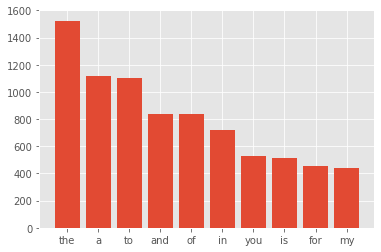

In [19]:
x,y=zip(*top)
print(x,y)
plt.bar(x,y)

<BarContainer object of 10 artists>

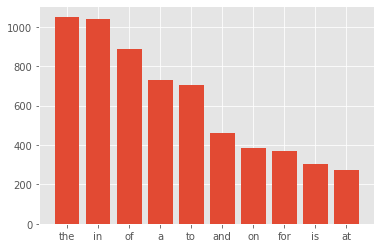

In [20]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    


x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 18 artists>

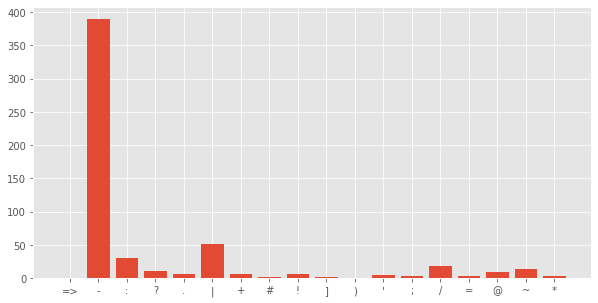

In [21]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 20 artists>

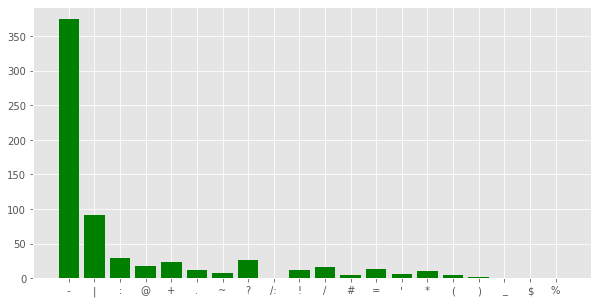

In [22]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')

In [23]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:40]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

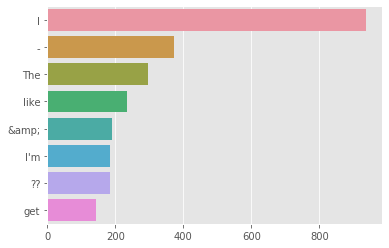

In [24]:
sns.barplot(x=y,y=x)

In [25]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

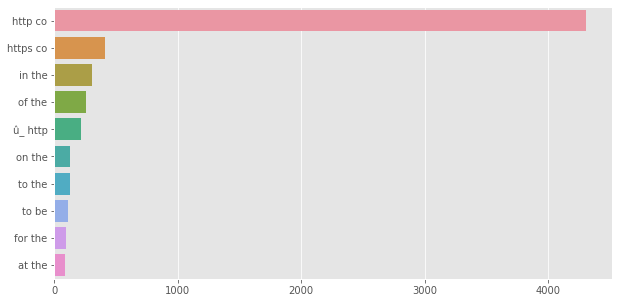

In [26]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(train_pandas['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [27]:
df=pd.concat([train_pandas,test_pandas])
df.shape

E:\Users\gunpc\Anaconda3\envs\tensorflowgpu1.4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(10876, 5)

In [28]:
train_pandas

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [29]:
test_pandas

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [30]:
df

,id,keyword,location,target,text
0,1,NaN,NaN,1.0,Our Deeds are the Reason of this #earthquake M...
1,4,NaN,NaN,1.0,Forest fire near La Ronge Sask. Canada
2,5,NaN,NaN,1.0,All residents asked to 'shelter in place' are ...
3,6,NaN,NaN,1.0,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,1.0,Just got sent this photo from Ruby #Alaska as ...
...,...,...,...,...,...
3258,10861,NaN,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [31]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [32]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [33]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [34]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [35]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [36]:
df['text']=df['text'].apply(lambda x : remove_html(x))

In [37]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [38]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [39]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [40]:
example="I am a #king"
table=str.maketrans('','',string.punctuation)
print(table)
print(string.punctuation)
example = example.translate(table)
print(example)
print(str.maketrans('','','A'))

{33: None, 34: None, 35: None, 36: None, 37: None, 38: None, 39: None, 40: None, 41: None, 42: None, 43: None, 44: None, 45: None, 46: None, 47: None, 58: None, 59: None, 60: None, 61: None, 62: None, 63: None, 64: None, 91: None, 92: None, 93: None, 94: None, 95: None, 96: None, 123: None, 124: None, 125: None, 126: None}
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
I am a king
{65: None}


In [41]:
df['text']=df['text'].apply(lambda x : remove_punct(x))

In [42]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect me plese"
correct_spellings(text)

'correct me please'

In [43]:
# df['text']=df['text'].apply(lambda x : correct_spellings(x))

In [44]:
from tqdm import tqdm
import ipywidgets

In [45]:
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [46]:
corpus=create_corpus(df)

100%|██████████████████████████████████████████████████████████████████████████| 10876/10876 [00:01<00:00, 9710.73it/s]


In [47]:
embedding_dict={}
with open('../input/glove.6B.100d.txt','r', encoding='UTF8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [49]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
# from tensorflow.keras.initializers import Constant
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.optimizers import Adam

In [50]:
print('tensorflow version: {}'.format(tf.__version__))
print('GPU 사용 가능 여부: {}'.format(tf.test.is_gpu_available()))

tensorflow version: 1.14.0
GPU 사용 가능 여부: True


In [52]:
MAX_LEN=50
tokenizer_obj=tf.keras.preprocessing.text.Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [53]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 20342


In [54]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|████████████████████████████████████████████████████████████████████████| 20342/20342 [00:00<00:00, 549749.24it/s]


In [57]:
model=tf.keras.models.Sequential()

embedding=tf.keras.layers.Embedding(num_words,100,embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(tf.keras.layers.SpatialDropout1D(0.2))
model.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


optimzer=tf.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           2034300   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 100)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 64)                42240     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 2,076,605
Trainable params: 42,305
Non-trainable params: 2,034,300
_________________________________________________________________


In [61]:
train=tweet_pad[:train_pandas.shape[0]]
test=tweet_pad[train_pandas.shape[0]:]

In [66]:
X_train,X_test,y_train,y_test=train_test_split(train,train_pandas['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [67]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Train on 6471 samples, validate on 1142 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
6471/6471 - 247s - loss: 0.6917 - acc: 0.5698 - val_loss: 0.6902 - val_acc: 0.5648
Epoch 2/15
6471/6471 - 242s - loss: 0.6877 - acc: 0.5713 - val_loss: 0.6861 - val_acc: 0.5648
Epoch 3/15
6471/6471 - 245s - loss: 0.6770 - acc: 0.5716 - val_loss: 0.6486 - val_acc: 0.5648
Epoch 4/15
6471/6471 - 246s - loss: 0.6090 - acc: 0.6701 - val_loss: 0.5387 - val_acc: 0.7644
Epoch 5/15
6471/6471 - 242s - loss: 0.5736 - acc: 0.7286 - val_loss: 0.5171 - val_acc: 0.7671
Epoch 6/15
6471/6471 - 241s - loss: 0.5606 - acc: 0.7438 - val_loss: 0.5076 - val_acc: 0.7680
Epoch 7/15
6471/6471 - 246s - loss: 0.5593 - acc: 0.7435 - val_loss: 0.5038 - val_acc: 0.7723
Epoch 8/15
6471/6471 - 241s - loss: 0.5529 - acc: 0.7541 - val_loss: 0.4991 - val_acc: 0.7758
Epoch 9/15
6471/6471 - 240s - loss: 0.5470 - acc: 0.7472 - val_loss: 0.4966 - val_acc: 0.7802
Epoch 10/15


In [68]:
sample_sub=pd.read_csv('../input/sample_submission.csv')

In [69]:
y_pre=model.predict(test)
y_pre=np.round(y_pre).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pre})
sub.to_csv('submission.csv',index=False)

In [70]:
print(y_pre)

[1 0 1 ... 1 1 1]


In [71]:
sub.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1
